In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv('Data/3months_vc.csv')
                     

In [3]:
df.columns

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')

In [4]:
df = df[['datetime', 'temp', 'precip', 'humidity', 'windspeed', 'sealevelpressure', 'winddir', ]]
df.head()

,datetime,temp,precip,humidity,windspeed,sealevelpressure,winddir
0,2023-07-01T00:00:00,73.1,0.0,53.33,6.9,1017.7,231
1,2023-07-01T01:00:00,73.1,0.0,49.60,3.4,1017.4,210
2,2023-07-01T02:00:00,72.0,0.0,53.18,0.0,1017.5,360
3,2023-07-01T03:00:00,71.1,0.0,57.01,5.8,1017.1,228
4,2023-07-01T04:00:00,70.1,0.0,61.08,3.4,1017.2,220


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df['date'] = df['datetime'].dt.date
df['date'].head()

0    2023-07-01
1    2023-07-01
2    2023-07-01
3    2023-07-01
4    2023-07-01
Name: date, dtype: object

In [7]:
df['date'].tail()

2203    2023-09-30
2204    2023-09-30
2205    2023-09-30
2206    2023-09-30
2207    2023-09-30
Name: date, dtype: object

In [8]:
day_df_max = df.groupby('date')[['temp', 'precip', 'humidity', 'windspeed']].agg('max')

In [9]:
day_df_min = df.groupby('date')[['temp', 'precip', 'humidity', 'windspeed']].agg('min')

In [10]:
day_df_max['max_precip_prev1d'] = day_df_max['precip'].rolling(1, closed = 'left').max()
day_df_max['max_precip_prev3d'] = day_df_max['precip'].rolling(3, closed = 'left').max()

day_df_max['max_temp_prev1d'] = day_df_max['temp'].rolling(1, closed = 'left').max()
day_df_max['max_temp_prev3d'] = day_df_max['temp'].rolling(3, closed = 'left').max()

In [11]:
day_df_max['min_precip_prev1d'] = day_df_min['precip'].rolling(1, closed = 'left').min()
day_df_max['min_precip_prev3d'] = day_df_min['precip'].rolling(3, closed = 'left').min()

day_df_max['min_temp_prev1d'] = day_df_min['temp'].rolling(1, closed = 'left').min()
day_df_max['min_temp_prev3d'] = day_df_min['temp'].rolling(3, closed = 'left').min()

In [12]:
day_df_max

,temp,precip,humidity,windspeed,max_precip_prev1d,max_precip_prev3d,max_temp_prev1d,max_temp_prev3d,min_precip_prev1d,min_precip_prev3d,min_temp_prev1d,min_temp_prev3d
date,,,,,,,,,,,,
2023-07-01,82.1,0.000,78.61,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-02,84.8,0.095,94.07,13.1,0.000,NaN,82.1,NaN,0.0,NaN,69.2,NaN
2023-07-03,87.2,0.240,94.14,8.1,0.095,NaN,84.8,NaN,0.0,NaN,70.1,NaN
2023-07-04,82.1,0.037,93.51,6.9,0.240,0.240,87.2,87.2,0.0,0.0,73.1,69.2
2023-07-05,92.0,0.000,90.71,5.8,0.037,0.240,82.1,87.2,0.0,0.0,73.1,70.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,60.2,0.031,90.52,12.8,0.089,0.217,65.0,65.9,0.0,0.0,57.0,57.0
2023-09-27,63.0,0.000,80.07,15.0,0.031,0.217,60.2,65.9,0.0,0.0,56.1,56.1
2023-09-28,64.1,0.051,93.17,11.5,0.000,0.089,63.0,65.0,0.0,0.0,51.2,51.2


In [13]:
day_df_max.rename(columns = {'temp':'temp_label'}, inplace = True)

In [14]:
day_df_max.drop(['precip', 'humidity', 'windspeed'], axis = 1, inplace = True)

In [15]:
day_df_max

,temp_label,max_precip_prev1d,max_precip_prev3d,max_temp_prev1d,max_temp_prev3d,min_precip_prev1d,min_precip_prev3d,min_temp_prev1d,min_temp_prev3d
date,,,,,,,,,
2023-07-01,82.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-02,84.8,0.000,NaN,82.1,NaN,0.0,NaN,69.2,NaN
2023-07-03,87.2,0.095,NaN,84.8,NaN,0.0,NaN,70.1,NaN
2023-07-04,82.1,0.240,0.240,87.2,87.2,0.0,0.0,73.1,69.2
2023-07-05,92.0,0.037,0.240,82.1,87.2,0.0,0.0,73.1,70.1
...,...,...,...,...,...,...,...,...,...
2023-09-26,60.2,0.089,0.217,65.0,65.9,0.0,0.0,57.0,57.0
2023-09-27,63.0,0.031,0.217,60.2,65.9,0.0,0.0,56.1,56.1
2023-09-28,64.1,0.000,0.089,63.0,65.0,0.0,0.0,51.2,51.2


In [16]:


# Day and month features

df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

In [17]:
df = pd.merge(df, day_df_max, on = 'date', how = 'left')

In [18]:
for i in range(1,24):
    df[f'temp_lag_{i}'] = df['temp'].shift(i)

In [19]:
df.columns

Index(['datetime', 'temp', 'precip', 'humidity', 'windspeed',
       'sealevelpressure', 'winddir', 'date', 'day', 'month', 'hour',
       'temp_label', 'max_precip_prev1d', 'max_precip_prev3d',
       'max_temp_prev1d', 'max_temp_prev3d', 'min_precip_prev1d',
       'min_precip_prev3d', 'min_temp_prev1d', 'min_temp_prev3d', 'temp_lag_1',
       'temp_lag_2', 'temp_lag_3', 'temp_lag_4', 'temp_lag_5', 'temp_lag_6',
       'temp_lag_7', 'temp_lag_8', 'temp_lag_9', 'temp_lag_10', 'temp_lag_11',
       'temp_lag_12', 'temp_lag_13', 'temp_lag_14', 'temp_lag_15',
       'temp_lag_16', 'temp_lag_17', 'temp_lag_18', 'temp_lag_19',
       'temp_lag_20', 'temp_lag_21', 'temp_lag_22', 'temp_lag_23'],
      dtype='object')

In [20]:
df.head(30)

,datetime,temp,precip,humidity,windspeed,sealevelpressure,winddir,date,day,month,...,temp_lag_14,temp_lag_15,temp_lag_16,temp_lag_17,temp_lag_18,temp_lag_19,temp_lag_20,temp_lag_21,temp_lag_22,temp_lag_23
0,2023-07-01 00:00:00,73.1,0.000,53.33,6.9,1017.7,231,2023-07-01,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-07-01 01:00:00,73.1,0.000,49.60,3.4,1017.4,210,2023-07-01,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-07-01 02:00:00,72.0,0.000,53.18,0.0,1017.5,360,2023-07-01,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-07-01 03:00:00,71.1,0.000,57.01,5.8,1017.1,228,2023-07-01,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-07-01 04:00:00,70.1,0.000,61.08,3.4,1017.2,220,2023-07-01,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-07-01 05:00:00,70.1,0.000,65.17,3.4,1017.4,210,2023-07-01,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-07-01 06:00:00,69.2,0.000,69.87,0.0,1017.6,360,2023-07-01,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2023-07-01 07:00:00,70.1,0.000,73.14,0.0,1017.8,360,2023-07-01,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023-07-01 08:00:00,74.0,0.000,61.98,0.0,1018.0,360,2023-07-01,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023-07-01 09:00:00,74.9,0.000,57.51,0.0,1018.1,359,2023-07-01,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = df.iloc[72:]

In [23]:
df.fillna(-1, inplace = True)

In [24]:
df.drop(['datetime'], axis = 1, inplace = True)

In [25]:
df['date']

72      2023-07-04
73      2023-07-04
74      2023-07-04
75      2023-07-04
76      2023-07-04
           ...    
2203    2023-09-30
2204    2023-09-30
2205    2023-09-30
2206    2023-09-30
2207    2023-09-30
Name: date, Length: 2136, dtype: object

In [26]:
train_df = df[df['date'] <= pd.to_datetime('2023-09-20').date()]
test_df = df[df['date'] > pd.to_datetime('2023-09-20').date()]

In [27]:
len(train_df)

1896

In [28]:
len(test_df)

240

In [29]:
X_train, y_train = train_df.drop(['temp_label', 'date'], axis = 1).values, train_df['temp'].values
X_test, y_test = test_df.drop(['temp_label', 'date'], axis = 1).values, test_df['temp'].values

In [40]:
train_df.columns

Index(['temp', 'precip', 'humidity', 'windspeed', 'sealevelpressure',
       'winddir', 'date', 'day', 'month', 'hour', 'temp_label',
       'max_precip_prev1d', 'max_precip_prev3d', 'max_temp_prev1d',
       'max_temp_prev3d', 'min_precip_prev1d', 'min_precip_prev3d',
       'min_temp_prev1d', 'min_temp_prev3d', 'temp_lag_1', 'temp_lag_2',
       'temp_lag_3', 'temp_lag_4', 'temp_lag_5', 'temp_lag_6', 'temp_lag_7',
       'temp_lag_8', 'temp_lag_9', 'temp_lag_10', 'temp_lag_11', 'temp_lag_12',
       'temp_lag_13', 'temp_lag_14', 'temp_lag_15', 'temp_lag_16',
       'temp_lag_17', 'temp_lag_18', 'temp_lag_19', 'temp_lag_20',
       'temp_lag_21', 'temp_lag_22', 'temp_lag_23'],
      dtype='object')

In [30]:
# X, y = df.drop(['temp_label'], axis = 1).values, df['temp'].values

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
xgb_reg = XGBRegressor()

In [33]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred = xgb_reg.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.35871902465820266

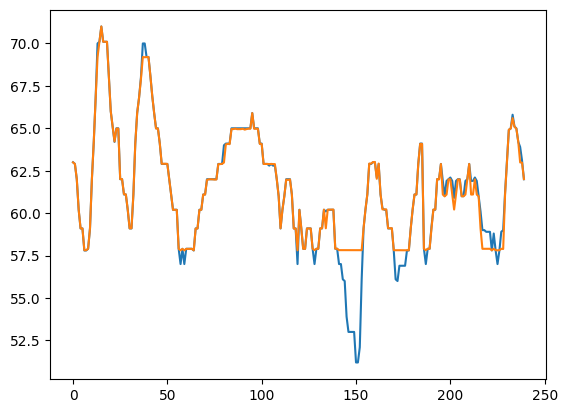

In [36]:
plt.plot(y_test)
plt.plot(y_pred)

In [37]:
import pickle
file_name = "models/xgb_reg_final.pkl"

# save
pickle.dump(xgb_reg, open(file_name, "wb"))


In [38]:
pred_df = pd.DataFrame()
pred_df.index = test_df.index
pred_df['true_label'] = y_test
pred_df['pred_label'] = y_pred



In [39]:
pred_df.head(15)

,true_label,pred_label
1968,63.0,62.991360
1969,62.9,62.901367
1970,62.0,62.001896
1971,60.2,60.202675
1972,59.1,59.101490
1973,59.1,59.099026
1974,57.8,57.813580
1975,57.8,57.816868
1976,57.9,57.904953
1977,59.1,59.111912


In [ ]:
############## PREV #############

In [7]:
df.set_index("datetime", inplace = True)

In [8]:
# Historical TMAX features

df['temp_prev10'] = df['temp'].rolling(10, closed = 'left').mean()
df['temp_prev7'] = df['temp'].rolling(7, closed = 'left').mean()
df['temp_prev3'] = df['temp'].rolling(3, closed = 'left').mean()
df['temp_prev1'] = df['temp'].rolling(1, closed = 'left').mean()

In [9]:
df['temp_nextday'] = np.concatenate((df["temp"].values[1:], np.array([-1])))

df.drop(['temp'], axis = 1, inplace = True)

In [10]:
df.head()

,precip,humidity,windspeed,sealevelpressure,winddir,day,month,hour,temp_prev10,temp_prev7,temp_prev3,temp_prev1,temp_nextday
datetime,,,,,,,,,,,,,
2023-07-01 00:00:00,0.0,53.33,6.9,1017.7,231,1,7,0,NaN,NaN,NaN,NaN,73.1
2023-07-01 01:00:00,0.0,49.60,3.4,1017.4,210,1,7,1,NaN,NaN,NaN,73.1,72.0
2023-07-01 02:00:00,0.0,53.18,0.0,1017.5,360,1,7,2,NaN,NaN,NaN,73.1,71.1
2023-07-01 03:00:00,0.0,57.01,5.8,1017.1,228,1,7,3,NaN,NaN,72.733333,72.0,70.1
2023-07-01 04:00:00,0.0,61.08,3.4,1017.2,220,1,7,4,NaN,NaN,72.066667,71.1,70.1


In [11]:
# Removing those buffer rows we used to computer the above features

df = df.iloc[10:, :]
df.head()

,precip,humidity,windspeed,sealevelpressure,winddir,day,month,hour,temp_prev10,temp_prev7,temp_prev3,temp_prev1,temp_nextday
datetime,,,,,,,,,,,,,
2023-07-01 10:00:00,0.0,57.49,0.0,1017.9,360,1,7,10,71.77,71.357143,73.000000,74.9,76.9
2023-07-01 11:00:00,0.0,56.23,0.0,1018.0,360,1,7,11,71.95,71.900000,74.600000,74.9,80.1
2023-07-01 12:00:00,0.0,50.58,4.7,1017.9,176,1,7,12,72.33,72.871429,75.566667,76.9,81.0
2023-07-01 13:00:00,0.0,49.14,0.0,1017.2,1,1,7,13,73.14,74.300000,77.300000,80.1,82.1
2023-07-01 14:00:00,0.0,45.38,3.4,1017.4,184,1,7,14,74.13,75.985714,79.333333,81.0,81.0


In [43]:
df.columns

Index(['temp', 'precip', 'humidity', 'windspeed', 'sealevelpressure',
       'winddir', 'date', 'day', 'month', 'hour', 'temp_label',
       'max_precip_prev1d', 'max_precip_prev3d', 'max_temp_prev1d',
       'max_temp_prev3d', 'min_precip_prev1d', 'min_precip_prev3d',
       'min_temp_prev1d', 'min_temp_prev3d', 'temp_lag_1', 'temp_lag_2',
       'temp_lag_3', 'temp_lag_4', 'temp_lag_5', 'temp_lag_6', 'temp_lag_7',
       'temp_lag_8', 'temp_lag_9', 'temp_lag_10', 'temp_lag_11', 'temp_lag_12',
       'temp_lag_13', 'temp_lag_14', 'temp_lag_15', 'temp_lag_16',
       'temp_lag_17', 'temp_lag_18', 'temp_lag_19', 'temp_lag_20',
       'temp_lag_21', 'temp_lag_22', 'temp_lag_23'],
      dtype='object')

In [12]:
lr_df = df.iloc[-1:]
lr_df.drop(['temp_nextday'], axis = 1, inplace = True)


df = df.iloc[:-1]

/var/folders/x5/1285xgcd3vl1lvxv_nmsdqtc0000gn/T/ipykernel_781/1060595523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_df.drop(['temp_nextday'], axis = 1, inplace = True)


In [13]:
df.fillna(-1, inplace = True)

In [14]:
df.head()

,precip,humidity,windspeed,sealevelpressure,winddir,day,month,hour,temp_prev10,temp_prev7,temp_prev3,temp_prev1,temp_nextday
datetime,,,,,,,,,,,,,
2023-07-01 10:00:00,0.0,57.49,0.0,1017.9,360,1,7,10,71.77,71.357143,73.000000,74.9,76.9
2023-07-01 11:00:00,0.0,56.23,0.0,1018.0,360,1,7,11,71.95,71.900000,74.600000,74.9,80.1
2023-07-01 12:00:00,0.0,50.58,4.7,1017.9,176,1,7,12,72.33,72.871429,75.566667,76.9,81.0
2023-07-01 13:00:00,0.0,49.14,0.0,1017.2,1,1,7,13,73.14,74.300000,77.300000,80.1,82.1
2023-07-01 14:00:00,0.0,45.38,3.4,1017.4,184,1,7,14,74.13,75.985714,79.333333,81.0,81.0


In [15]:
train_df, test_df = train_test_split(df)

In [16]:
X_train, X_test, y_train, y_test = train_df.drop(['temp_nextday'], axis = 1).values, test_df.drop(['temp_nextday'], axis = 1).values, train_df['temp_nextday'].values, test_df['temp_nextday'].values 


In [17]:
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

1.2925748554576524

In [20]:
model.predict(lr_df)

array([61.5989], dtype=float32)

In [213]:
def give_next24hrs_pred(model, df):

    df = df[['datetime', 'temp', 'precip', 'humidity', 'windspeed', 'sealevelpressure', 'winddir']]
        
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Day and month features
    
    df['day'] = df['datetime'].dt.day
    df['month'] = df['datetime'].dt.month
    df['hour'] = df['datetime'].dt.hour


    preds = []

    for i in range(24):

    
        # Historical TMAX features
        
        df['temp_prev10'] = df['temp'].rolling(10).mean()
        df['temp_prev7'] = df['temp'].rolling(7).mean()
        df['temp_prev3'] = df['temp'].rolling(3).mean()
        df['temp_prev1'] = df['temp'].rolling(1).mean()
        
        df.fillna(-1, inplace = True)

    
        temps = model.predict(df.drop(['datetime', 'temp'], axis = 1).iloc[-10:])


        preds.append([ x for x in temps])

        # Get the last row of the DataFrame
        last_row = df.iloc[-1:]
        
        # Append the last row to the end of the DataFrame
        df = pd.concat([df, last_row], ignore_index=True)
        
        # Reset the index
        df.reset_index(drop=True, inplace=True)

        last_row_index = len(df)-1
        
        df.loc[last_row_index, 'hour'] = df.loc[last_row_index, 'hour'] + 1 


        df.loc[-1, 'temp'] = temps[-1]

        # print(preds)

        # print(df)
        

    return np.transpose(preds)
    
    

In [214]:
xdf = pd.read_csv('Data/3months_vc.csv')

In [216]:
preds = give_next24hrs_pred(model, xdf.iloc[-15:])

In [217]:
preds.shape

(10, 24)

In [218]:
preds[-1]

array([62.715565, 64.17195 , 65.67632 , 70.70186 , 71.278435, 72.85445 ,
       74.2394  , 71.72371 , 72.077446, 72.775024, 73.2508  , 71.531906,
       72.82238 , 73.6003  , 71.51262 , 72.175156, 73.6003  , 72.02457 ,
       72.14237 , 73.51028 , 71.92723 , 71.84918 , 72.901306, 73.48902 ],
      dtype=float32)

In [274]:
pred_df = pd.DataFrame()
pred_df.index = test_df.index
pred_df['true_label'] = y_test
pred_df['pred_label'] = y_pred



In [275]:
pred_df

,true_label,pred_label
DATE,,
2008-06-11,85,83.585342
2000-08-15,80,77.771477
2021-06-08,90,91.029373
2002-07-29,96,83.941658
2011-08-14,72,84.623116
...,...,...
2016-08-01,80,83.223434
2009-11-05,53,59.240250
2001-06-12,83,78.525055


In [21]:
import pickle
file_name = "models/xgb_reg.pkl"

# save
pickle.dump(model, open(file_name, "wb"))


In [277]:
########### LINEAR REGRESSION ##############

In [278]:
lin_reg = LinearRegression()

In [279]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [280]:
y_pred = lin_reg.predict(X_test)

In [281]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

5.511266980928618

In [282]:
###############  TIME SERIES MODELS ####################

In [283]:
uni_df = df['TMAX']
uni_df

DATE
2000-01-08    38
2000-01-09    51
2000-01-10    58
2000-01-11    52
2000-01-12    47
              ..
2023-09-18    68
2023-09-19    72
2023-09-20    74
2023-09-21    71
2023-09-22    71
Name: TMAX, Length: 8659, dtype: int64

<Axes: xlabel='DATE'>

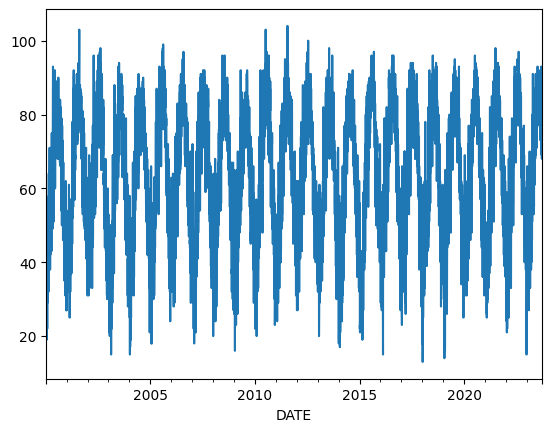

In [284]:
uni_df.plot()

In [285]:
# uni_df = train_test_split(uni_df, 

In [286]:
from statsmodels.tsa.arima.model import ARIMA


In [287]:
model = ARIMA(uni_df.values, order=(1,1,0))


In [288]:
model_fit = model.fit()


In [289]:
yhat = model_fit.forecast()[0]
yhat

71.0

In [290]:
uni_df.tail()

DATE
2023-09-18    68
2023-09-19    72
2023-09-20    74
2023-09-21    71
2023-09-22    71
Name: TMAX, dtype: int64

In [291]:
######################## VAR #############################